In [663]:
%reset

In [665]:
# Code for calculating powder mass flow from offline weigh data
# Created: 06-14-2024
# Modified: 05-23-2024

# Analysis for DATE DATE DATE

import pandas as pd
import numpy as np
import os
from os import listdir
from os.path import isfile, join
import importlib
from pathlib import Path


from powder_functions import *
import powder_functions
powder_functions = importlib.reload(powder_functions)

# Copy + paste files to analyze in data
# Set variables (RPM and step time) based on experimental parameters
# Run program
# Ideally, plot exported csv files in R


# Variables

In [666]:
# IF ANALYZING MORE THAN 1 DATASET, ***EXPERIMENTAL VARIABLES MUST BE THE SAME***
# Range of RPMs and time steps must be equal

# Folder name for exported files
experimentID = "(230123) PML Nb 0.1-0.3RPM 5LPM"


# List range of RPMs tested
RPM = np.array([0.1, 0.2, 0.3])

# See getMassFlow step
"""# Designate start and end times for RPM changes
# Experiment start deposition, end deposition, time period at a single RPM
start_time = np.arange(10, 100, 20)
end_time = np.arange(20, 110, 20)"""

'# Designate start and end times for RPM changes\n# Experiment start deposition, end deposition, time period at a single RPM\nstart_time = np.arange(10, 100, 20)\nend_time = np.arange(20, 110, 20)'

# Import Data

In [667]:
csv = [os.path.splitext(file)[0] for file in os.listdir("data/") if file.endswith('.csv')]
print(csv)

importData = {}
data = {}

for file in csv:
    filepath = os.path.join("data/", file + ".csv")
    importData[file] = pd.read_csv(filepath)
    filename = file.replace('.csv', '')

['(230123) Powder Flow Measurement_Nb_5LPM']


# Clean Data

In [668]:
clean_data = {}
delay = {}

# Input an overestimate of the delay row index
# Used to find largest change in initial values (experiment start)
overestimate_delay = 1000

for file in csv:
    clean_data[file], delay[file] = cleanData(importData[file], overestimate_delay)

print(clean_data)
print(delay)

Experiment begins at row index 395
The delay is 4.315 sec

{'(230123) Powder Flow Measurement_Nb_5LPM':         Time    Mass
408    0.143 -0.0008
409    0.154  0.2964
410    0.165  0.3262
411    0.176  0.3544
412    0.187  0.3811
...      ...     ...
9536  99.845  6.6762
9537  99.856  6.6935
9538  99.867  6.6958
9539  99.878  6.6971
9540  99.889  6.6978

[9133 rows x 2 columns]}
{'(230123) Powder Flow Measurement_Nb_5LPM': 4.315}



# Calculate Steady State Mass Flow

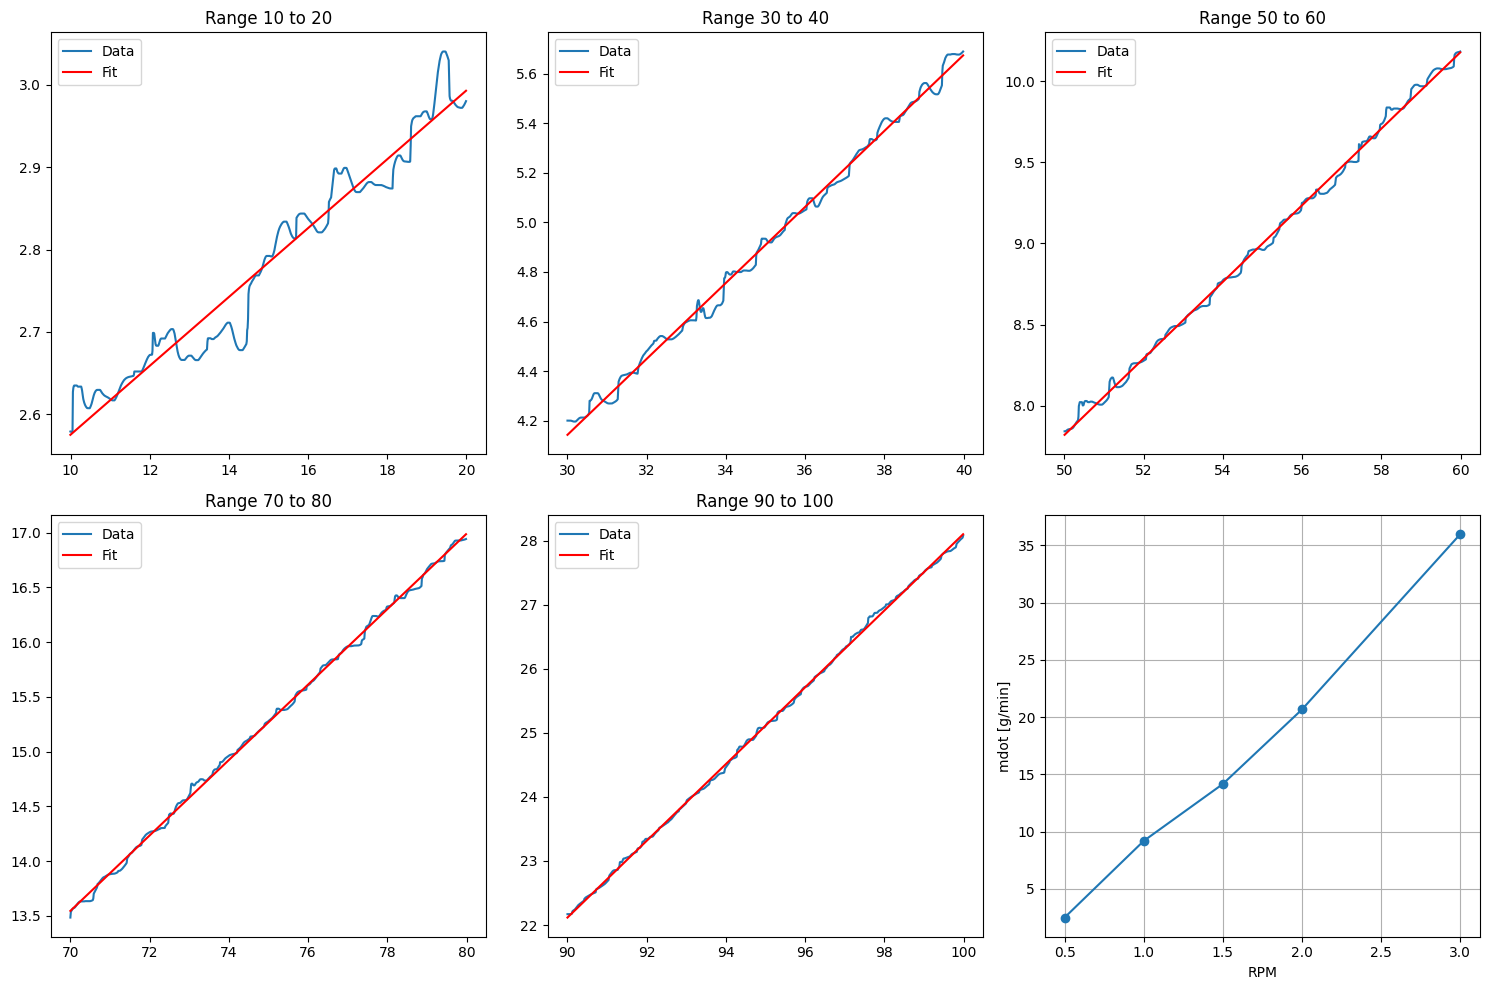

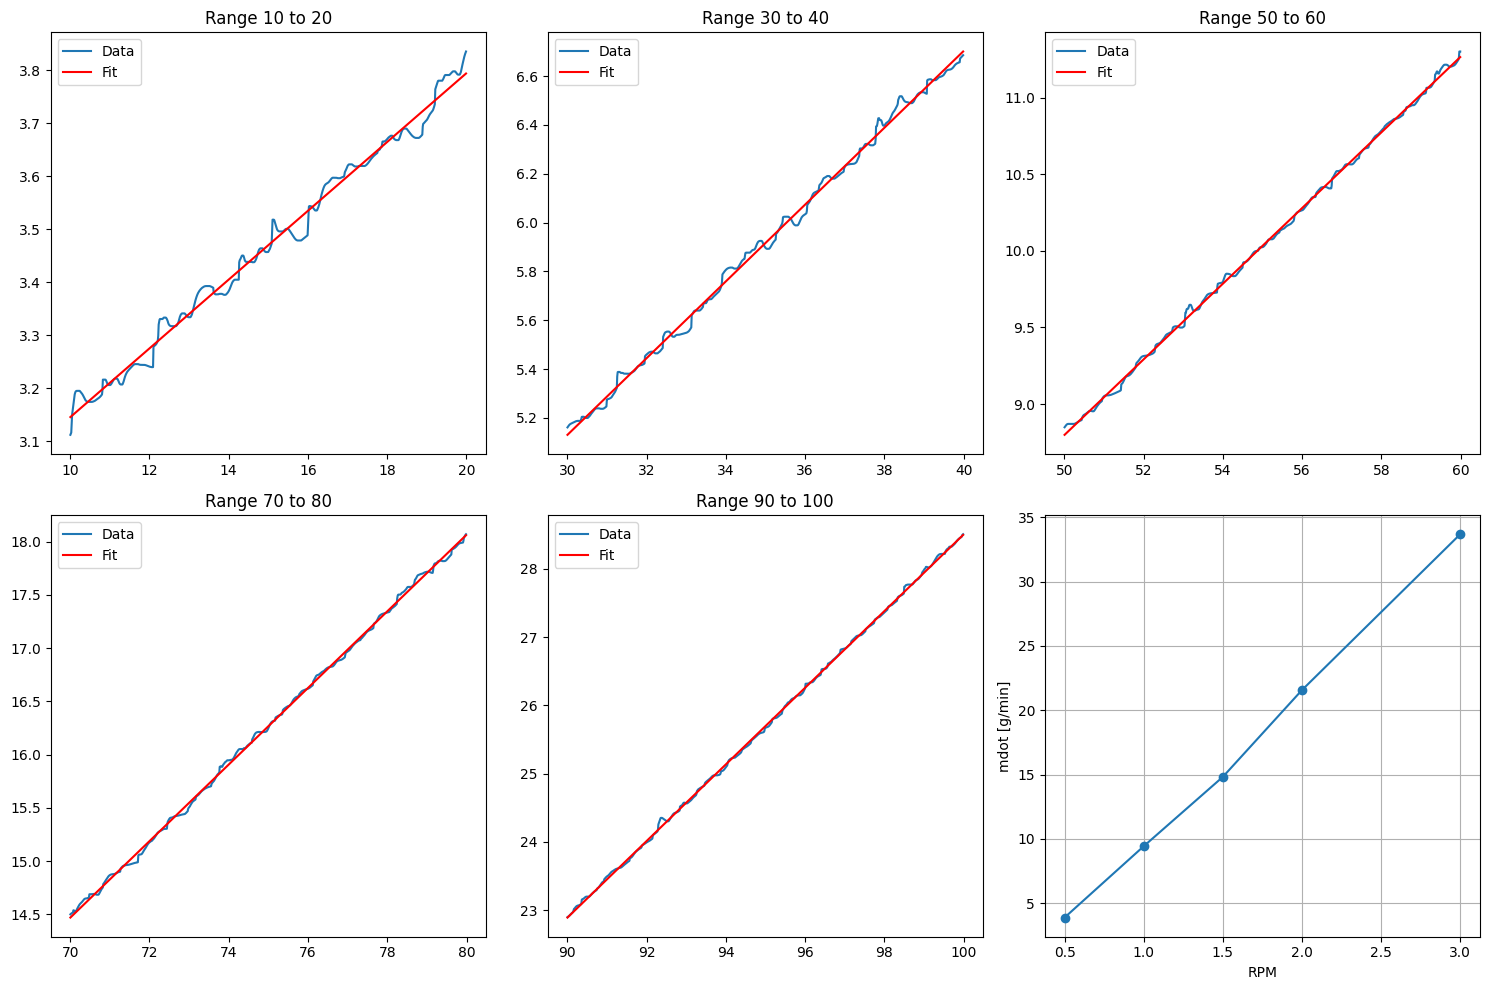

{'(230123) Powder Flow Measurement_IN718_5LPM':    RPM  Mass Flow [g/min]
0  0.5           2.504754
1  1.0           9.195160
2  1.5          14.166321
3  2.0          20.671835
4  3.0          35.975541, '(230123) Powder Flow Measurement_SS316L_5LPM':    RPM  Mass Flow [g/min]
0  0.5           3.897229
1  1.0           9.436802
2  1.5          14.824354
3  2.0          21.566729
4  3.0          33.673054}


In [657]:
mass_flow = {}

# Designate start and end times for RPM changes
# Experiment start deposition, end deposition, time period at a single RPM
start_time = np.arange(10, 70, 20)
end_time = np.arange(20, 80, 20)

for file in csv:
    mass_flow[file] = getMassFlow(clean_data[file], RPM, start_time, end_time)

print(mass_flow)



# Plot Mass Flow

In [ ]:
"""fig, axs = plt.subplots(2, 3, figsize=(15, 10))

    for i in range(len(start_time)):
        # Segment data into chunks for a single RPM
        start_RPM = np.argmin(np.abs(df['Time'] - start_time[i]))
        end_RPM = np.argmin(np.abs(df['Time'] - end_time[i]))

        time_RPM = df['Time'][start_RPM:end_RPM]
        mass_RPM = df['Mass'][start_RPM:end_RPM]

        # Fit linear model
        slope, intercept, _, _, _ = linregress(time_RPM, mass_RPM)
        mdot[i] = slope

        # Plot fitted line
        axs[i // 3, i % 3].plot(time_RPM, mass_RPM, label='Data')
        axs[i // 3, i % 3].plot(time_RPM, intercept + slope * time_RPM, 'r-', label='Fit')
        axs[i // 3, i % 3].set_title(f'Range {start_time[i]} to {end_time[i]}')
        axs[i // 3, i % 3].legend()

    # Plot RPM vs mdot
    plt.subplot(2, 3, 6)
    plt.plot(RPM, mdot * 60, 'o-')
    plt.xlabel('RPM')
    plt.ylabel('mdot (g/min)')
    plt.grid(True)

    plt.tight_layout()
    plt.show()"""

# Save Files

In [661]:
export_path = os.path.join("export", experimentID)

# Make a folder in export to save procesed files
if not os.path.exists(export_path):
    os.makedirs(export_path)

for file in csv:
    clean_data[file].to_csv(os.path.join(export_path, file + "_CLEAN.csv"), index=False)
    mass_flow[file].to_csv(os.path.join(export_path, file + "_MASSFLOW.csv"), index=False)

# Make a folder in archive to move raw files
if not os.path.exists(os.path.join("data/archive/", experimentID)):
    os.makedirs(os.path.join("data/archive/", experimentID))


# Summarize Data

In [662]:
#for file in csv:
summary = pd.concat([pd.DataFrame(mass_flow[file], columns=['Mass Flow [g/min]']) for file in csv], axis=1, ignore_index=True)
summary.columns = csv
summary.insert(0, "RPM", RPM)
summary.to_csv(os.path.join(export_path, "SUMMARY_" + experimentID + ".csv"), index=False)
print(export_path)

print(summary)

export\(230123) GTV IN718 SS316L Nb 0.5-3RPM 5LPM
   RPM  (230123) Powder Flow Measurement_IN718_5LPM  \
0  0.5                                     2.504754   
1  1.0                                     9.195160   
2  1.5                                    14.166321   
3  2.0                                    20.671835   
4  3.0                                    35.975541   

   (230123) Powder Flow Measurement_SS316L_5LPM  
0                                      3.897229  
1                                      9.436802  
2                                     14.824354  
3                                     21.566729  
4                                     33.673054  
